In [1]:
import os
from tqdm.auto import tqdm
import numpy as np
import pickle
import matplotlib.pyplot as plt
import shap

from sklearn.metrics import mean_absolute_error

from utils.feature_extraction_utils import zip_dicts
from utils.model_training_utils import load_features, select_features, stratify_perm_df, train_perm_model

c:\Users\Administrator\Documents\GitHub\mcsa-misalignment\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_folder = "./../data/"
features_folder = data_folder + "features/"
feature_subsets = ['low_res', 'high_res', 'combined']
selected_feature_subset = feature_subsets[2]

In [3]:
feat_dict = load_features(features_folder, selected_feature_subset)
feature_names_dict = {window_size:feat_df.drop(['misalignment', 'recording_nr', 'direction', 'speed', 'window_id'], axis=1).columns.values for window_size, feat_df in feat_dict.items()}

100%|██████████| 7/7 [00:00<00:00, 12.15it/s]


In [4]:
# Write own stratified function based on multible labels
stratify_perm_dict = {window_size:stratify_perm_df(feat_df, ['misalignment', 'direction', 'speed'], ['direction', 'speed']) for window_size, feat_df in feat_dict.items()}

In [ ]:
sel_feat_dict = {}
for window_size, feature_names in feature_names_dict.items():
    print("Window size:", window_size)
    window_key = f"window_size={window_size}"
    sel_feat_dict[window_key] = {}
    for config in stratify_perm_dict[window_size].keys():
        print("Config:", config)
        selected_feats, scores = select_features(feature_names, stratify_perm_dict[window_size][config])
        sel_feat_dict[window_key][config] = {
            "selected_features": selected_feats,
            "scores": scores
        }

# Check if selected folder exists
selected_folder = features_folder + 'selected/'
if not os.path.exists(selected_folder):
    # Create folder
    os.makedirs(selected_folder)
# Pickle the selected features and scores
with open(f"{selected_folder}selected_features_perm_{selected_feature_subset}.pkl", "wb") as f:
    pickle.dump(sel_feat_dict, f)

In [5]:
# Read the selected features from the pickle files
sel_feat_dict = {}
selected_folder = features_folder + 'selected/'
with open(f"{selected_folder}selected_features_perm_{selected_feature_subset}.pkl", "rb") as f:
    sel_feat_dict = pickle.load(f)
# Rename keys in dictionary
sel_feat_dict = {int(key.split('=')[1]):value for key, value in sel_feat_dict.items()}

In [6]:
for window_size, comb_dict in sel_feat_dict.items():
    print(f"Window size: {window_size}")
    for comb, score_dict in comb_dict.items():
        print(f"Combination: {comb}")
        print(f"Score: {score_dict['scores'][-1]}")
        print()

Window size: 800
Combination: ('H', 425)
Score: 0.153828415305226

Combination: ('H', 750)
Score: 0.08418722296765588

Combination: ('V', 425)
Score: 0.07497228634587333

Combination: ('V', 750)
Score: 0.07664607887963246

Window size: 6400
Combination: ('H', 425)
Score: 0.03324639984169425

Combination: ('H', 750)
Score: 0.026745701570820606

Combination: ('V', 425)
Score: 0.024042585588281023

Combination: ('V', 750)
Score: 0.029272019965940005

Window size: 400
Combination: ('H', 425)
Score: 0.22985931515920366

Combination: ('H', 750)
Score: 0.15649934487951983

Combination: ('V', 425)
Score: 0.11403119504743908

Combination: ('V', 750)
Score: 0.12227084716178341

Window size: 3200
Combination: ('H', 425)
Score: 0.04341279759079077

Combination: ('H', 750)
Score: 0.028370897760407708

Combination: ('V', 425)
Score: 0.02785613463439578

Combination: ('V', 750)
Score: 0.03187105383998908

Window size: 1600
Combination: ('H', 425)
Score: 0.08792714905593477

Combination: ('H', 750)
Sc

In [7]:
pipe_dict = {window_size:train_perm_model(window_size, split_dict, sel_feat_names) for window_size, split_dict, sel_feat_names in zip_dicts(stratify_perm_dict, sel_feat_dict)}

Window size:  800


  0%|          | 0/4 [00:00<?, ?it/s]

Config:  ('H', 425)


 25%|██▌       | 1/4 [00:32<01:36, 32.04s/it]

MAE over train folds: 0.06577066666931995 +/- 0.007885358083044169
MAE over test folds: 0.15554015536054028 +/- 0.005059874735094436

Config:  ('H', 750)


 50%|█████     | 2/4 [01:11<01:12, 36.36s/it]

MAE over train folds: 0.026520702559007275 +/- 0.009244457566842773
MAE over test folds: 0.0854661810910479 +/- 0.004792840252792983

Config:  ('V', 425)


 75%|███████▌  | 3/4 [01:52<00:38, 38.45s/it]

MAE over train folds: 0.028121513325793757 +/- 0.008544533892463301
MAE over test folds: 0.07543323974150774 +/- 0.0021483739520709077

Config:  ('V', 750)


100%|██████████| 4/4 [02:20<00:00, 35.13s/it]


MAE over train folds: 0.03611553610254574 +/- 0.006147781808924827
MAE over test folds: 0.07750889991243246 +/- 0.0024250891518710514

Window size:  6400


  0%|          | 0/4 [00:00<?, ?it/s]

Config:  ('H', 425)


 25%|██▌       | 1/4 [00:27<01:23, 27.99s/it]

MAE over train folds: 0.003074232670411886 +/- 0.000913397922676459
MAE over test folds: 0.032808040020916404 +/- 0.009620395512080633

Config:  ('H', 750)


 50%|█████     | 2/4 [00:59<01:00, 30.12s/it]

MAE over train folds: 0.0014440685500714495 +/- 8.41694562732889e-05
MAE over test folds: 0.02709944163488735 +/- 0.005364309794472358

Config:  ('V', 425)


 75%|███████▌  | 3/4 [01:20<00:25, 25.74s/it]

MAE over train folds: 0.0058433953757827 +/- 0.0041179206184595845
MAE over test folds: 0.026404092848801013 +/- 0.0053893098951698915

Config:  ('V', 750)


100%|██████████| 4/4 [01:41<00:00, 25.28s/it]


MAE over train folds: 0.005581819512533989 +/- 0.0027101026471575388
MAE over test folds: 0.03116126612202188 +/- 0.00788109681609183

Window size:  3200


  0%|          | 0/4 [00:00<?, ?it/s]

Config:  ('H', 425)


 25%|██▌       | 1/4 [00:38<01:55, 38.45s/it]

MAE over train folds: 0.007845811271226733 +/- 0.0010721113031146316
MAE over test folds: 0.04437679808039309 +/- 0.005823038440640941

Config:  ('H', 750)


 50%|█████     | 2/4 [01:03<01:01, 30.83s/it]

MAE over train folds: 0.005202888122654662 +/- 0.002073183778138096
MAE over test folds: 0.029436916294922205 +/- 0.008275069339828977

Config:  ('V', 425)


 75%|███████▌  | 3/4 [01:42<00:34, 34.21s/it]

MAE over train folds: 0.005092586537054286 +/- 0.0016638855495255676
MAE over test folds: 0.02891749290096233 +/- 0.004233309107141939

Config:  ('V', 750)


100%|██████████| 4/4 [02:14<00:00, 33.72s/it]


MAE over train folds: 0.005354880236261586 +/- 0.001337232506758661
MAE over test folds: 0.03304540650367791 +/- 0.004339418848257108

Window size:  1600


  0%|          | 0/4 [00:00<?, ?it/s]

Config:  ('H', 425)


 25%|██▌       | 1/4 [00:25<01:15, 25.05s/it]

MAE over train folds: 0.0402056323566163 +/- 0.006185114733583557
MAE over test folds: 0.08798373600956201 +/- 0.006241716816783997

Config:  ('H', 750)


 50%|█████     | 2/4 [01:05<01:08, 34.17s/it]

MAE over train folds: 0.009564273742194342 +/- 0.0027337025382936607
MAE over test folds: 0.04980344704529776 +/- 0.007052906466834755

Config:  ('V', 425)


 75%|███████▌  | 3/4 [01:45<00:36, 36.71s/it]

MAE over train folds: 0.018263572652916206 +/- 0.008857185224633373
MAE over test folds: 0.0484672092340385 +/- 0.005383841019745479

Config:  ('V', 750)


100%|██████████| 4/4 [02:00<00:00, 30.06s/it]


MAE over train folds: 0.021620027817563465 +/- 0.006724173892790346
MAE over test folds: 0.050999676665116754 +/- 0.007941492566415558

Window size:  12800


  0%|          | 0/4 [00:00<?, ?it/s]

Config:  ('H', 425)


 25%|██▌       | 1/4 [00:07<00:21,  7.11s/it]

MAE over train folds: 0.006088586710428572 +/- 0.004400468156358595
MAE over test folds: 0.03790290037945111 +/- 0.009500767346952809

Config:  ('H', 750)


 50%|█████     | 2/4 [00:14<00:14,  7.25s/it]

MAE over train folds: 0.002034550570267083 +/- 0.0010562901652622731
MAE over test folds: 0.03288881481698961 +/- 0.0062270451535710175

Config:  ('V', 425)


 75%|███████▌  | 3/4 [00:22<00:07,  7.44s/it]

MAE over train folds: 0.007245378496284429 +/- 0.0038569644360593345
MAE over test folds: 0.026845937562825044 +/- 0.006416826050044411

Config:  ('V', 750)


100%|██████████| 4/4 [00:26<00:00,  6.51s/it]


MAE over train folds: 0.005751338100006449 +/- 0.002681247405348845
MAE over test folds: 0.03097579844136831 +/- 0.00483127835203393

Window size:  400


  0%|          | 0/4 [00:00<?, ?it/s]

Config:  ('H', 425)


 25%|██▌       | 1/4 [00:11<00:34, 11.48s/it]

MAE over train folds: 0.16131069105822637 +/- 0.014750028146851299
MAE over test folds: 0.23186235040967224 +/- 0.0039509891239676975

Config:  ('H', 750)


 50%|█████     | 2/4 [00:44<00:48, 24.01s/it]

MAE over train folds: 0.07492997852722871 +/- 0.018668918455279557
MAE over test folds: 0.1576090656374029 +/- 0.004135848137424122

Config:  ('V', 425)


 75%|███████▌  | 3/4 [01:07<00:23, 23.53s/it]

MAE over train folds: 0.07187006139612695 +/- 0.0043606105863122175
MAE over test folds: 0.11398053314361031 +/- 0.0036351570896540216

Config:  ('V', 750)


100%|██████████| 4/4 [01:53<00:00, 28.33s/it]

MAE over train folds: 0.04981184205557119 +/- 0.002820375275991085
MAE over test folds: 0.12329688385959867 +/- 0.004359137653071332



Window size:  800
Config:  ('H', 425)


100%|██████████| 5/5 [00:06<00:00,  1.33s/it]


MAE over train folds: 0.06577066666931995 +/- 0.007885358083044169
MAE over test folds: 0.15554015536054028 +/- 0.005059874735094436


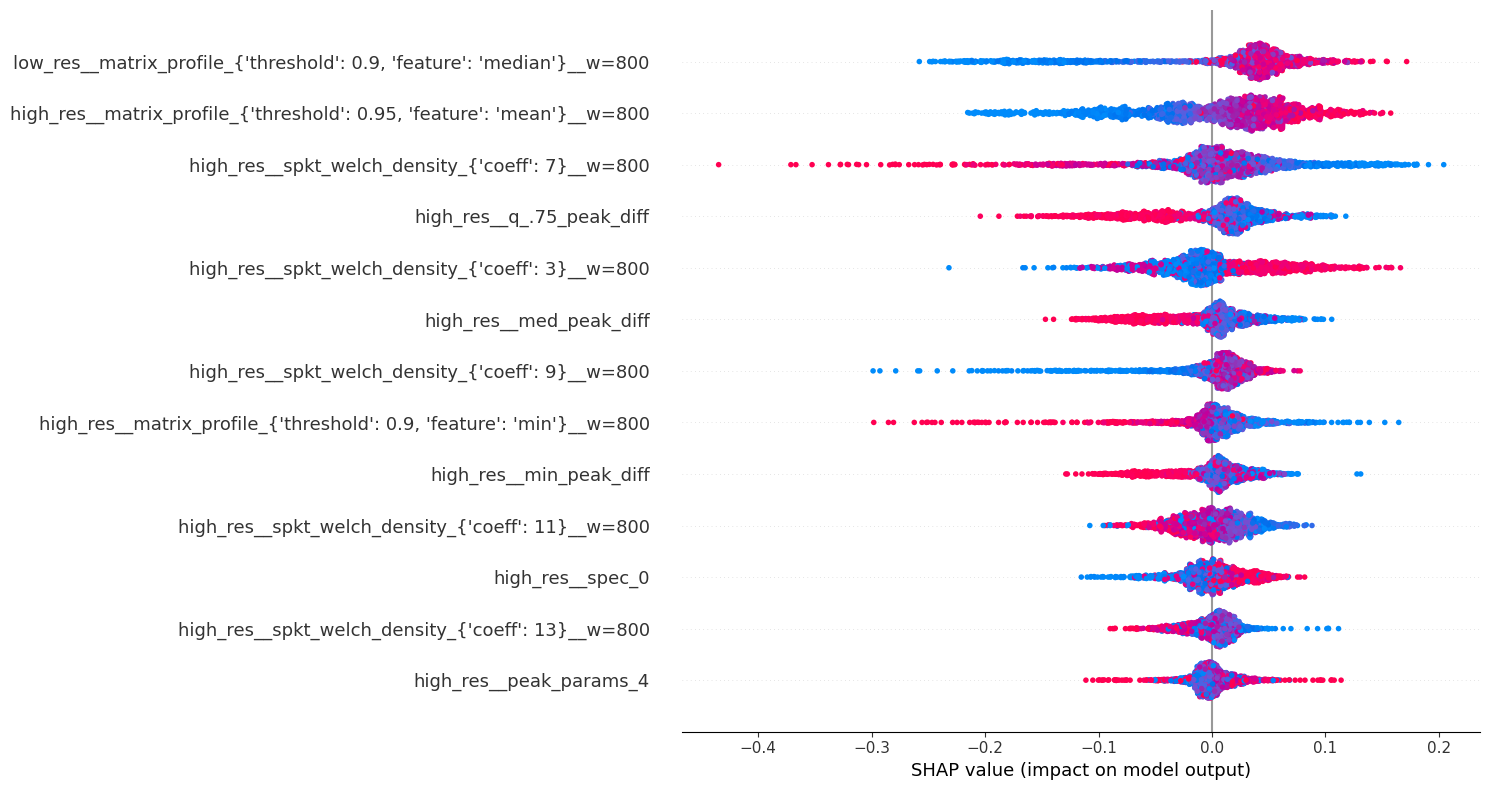

Config:  ('V', 750)


100%|██████████| 5/5 [00:07<00:00,  1.46s/it]


MAE over train folds: 0.03611553610254574 +/- 0.006147781808924827
MAE over test folds: 0.07750889991243246 +/- 0.0024250891518710514


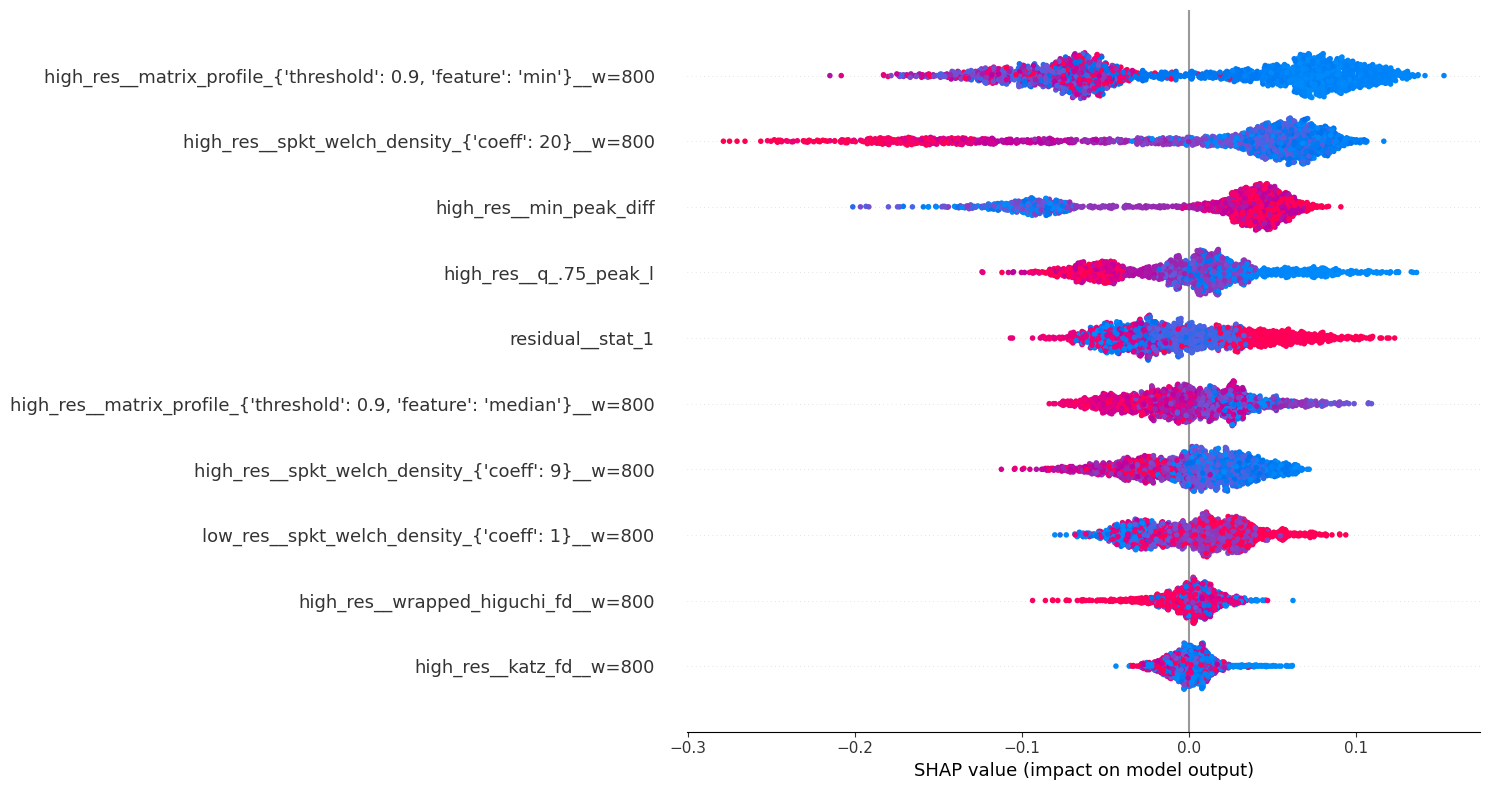

Config:  ('V', 425)


100%|██████████| 5/5 [00:09<00:00,  1.99s/it]


MAE over train folds: 0.028121513325793757 +/- 0.008544533892463301
MAE over test folds: 0.07543323974150774 +/- 0.0021483739520709077


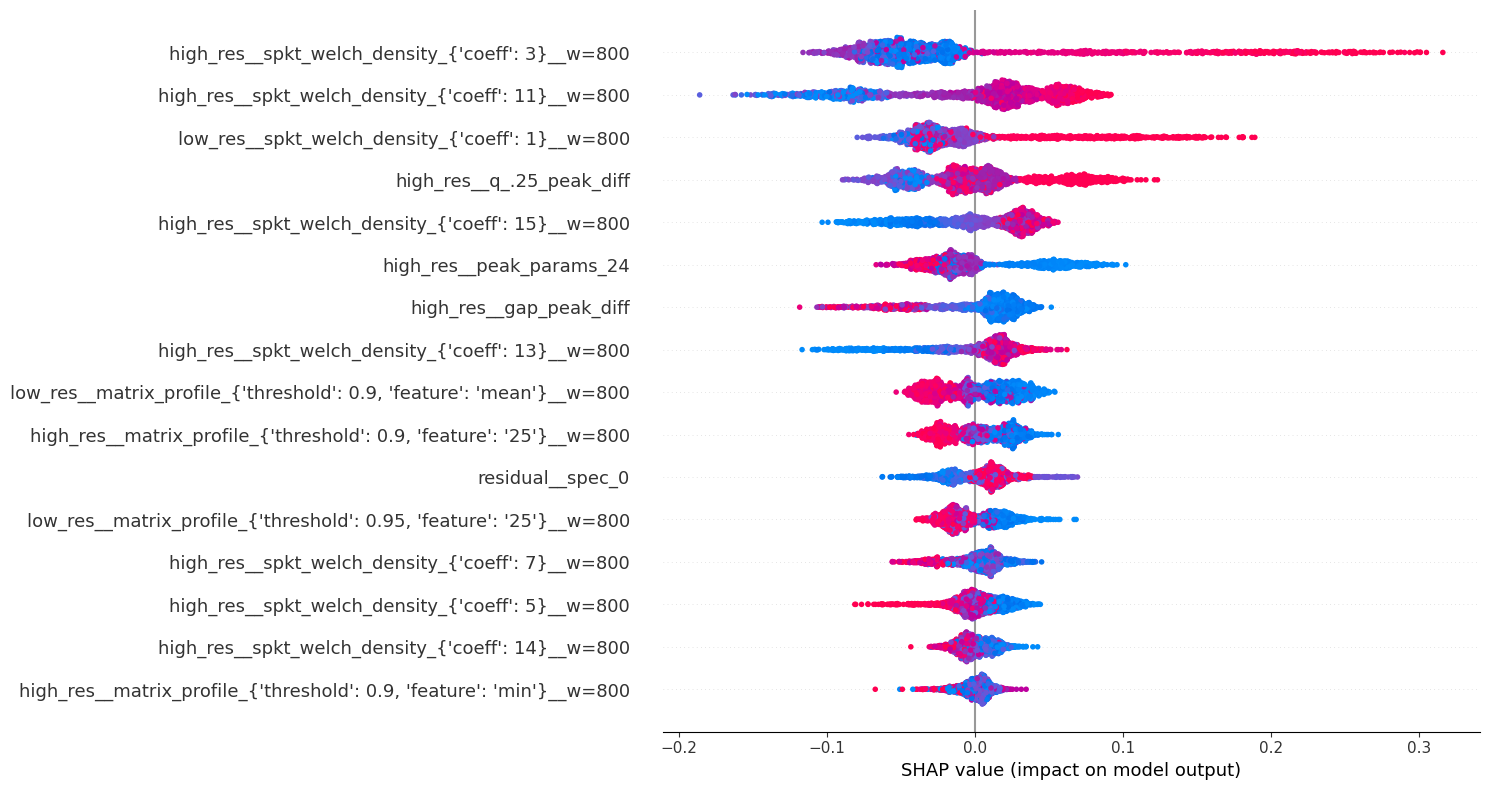

Config:  ('H', 750)


100%|██████████| 5/5 [00:07<00:00,  1.51s/it]


MAE over train folds: 0.026520702559007275 +/- 0.009244457566842773
MAE over test folds: 0.0854661810910479 +/- 0.004792840252792983


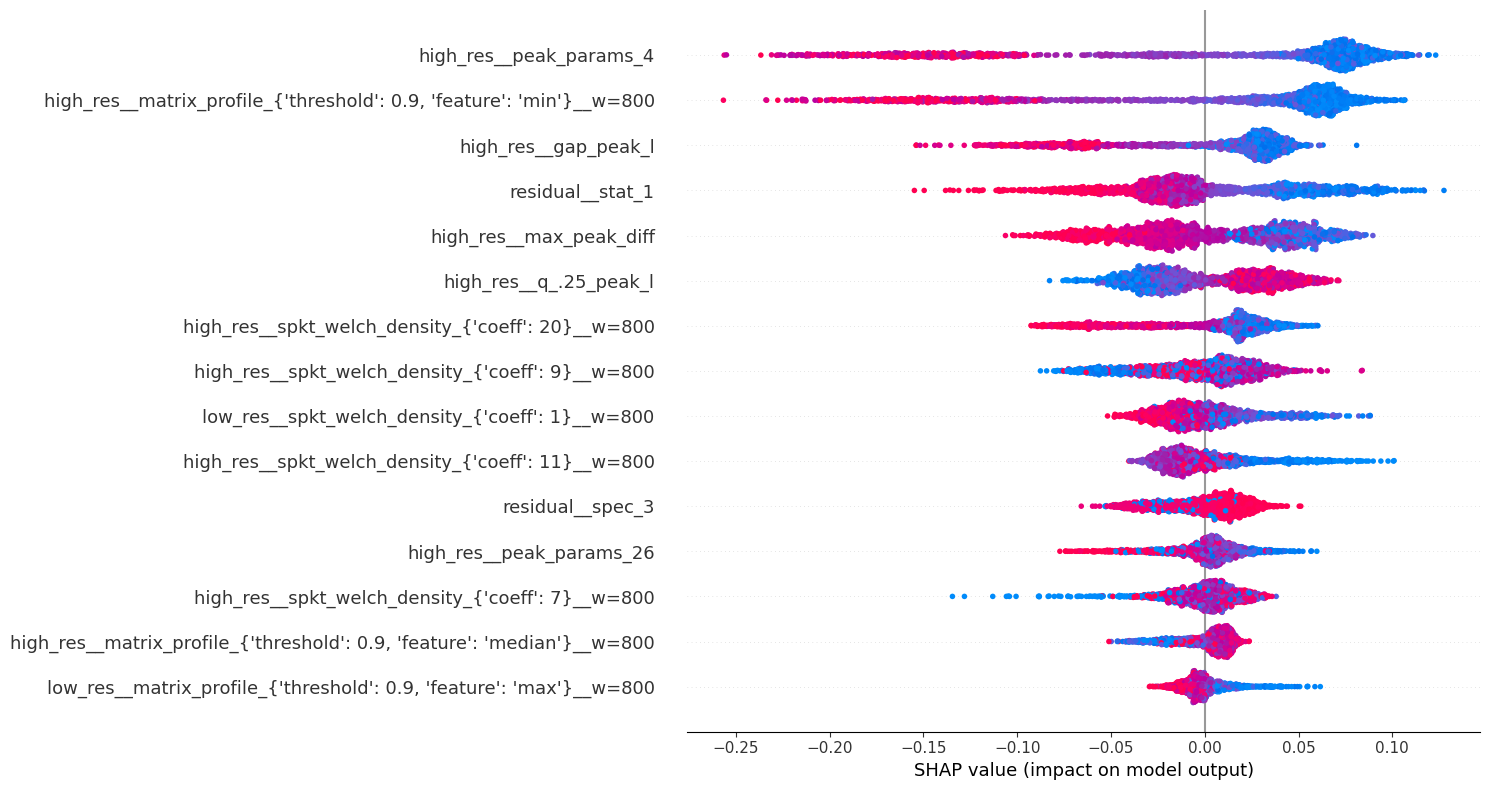

Window size:  6400
Config:  ('H', 425)


100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


MAE over train folds: 0.003074232670411886 +/- 0.000913397922676459
MAE over test folds: 0.032808040020916404 +/- 0.009620395512080633


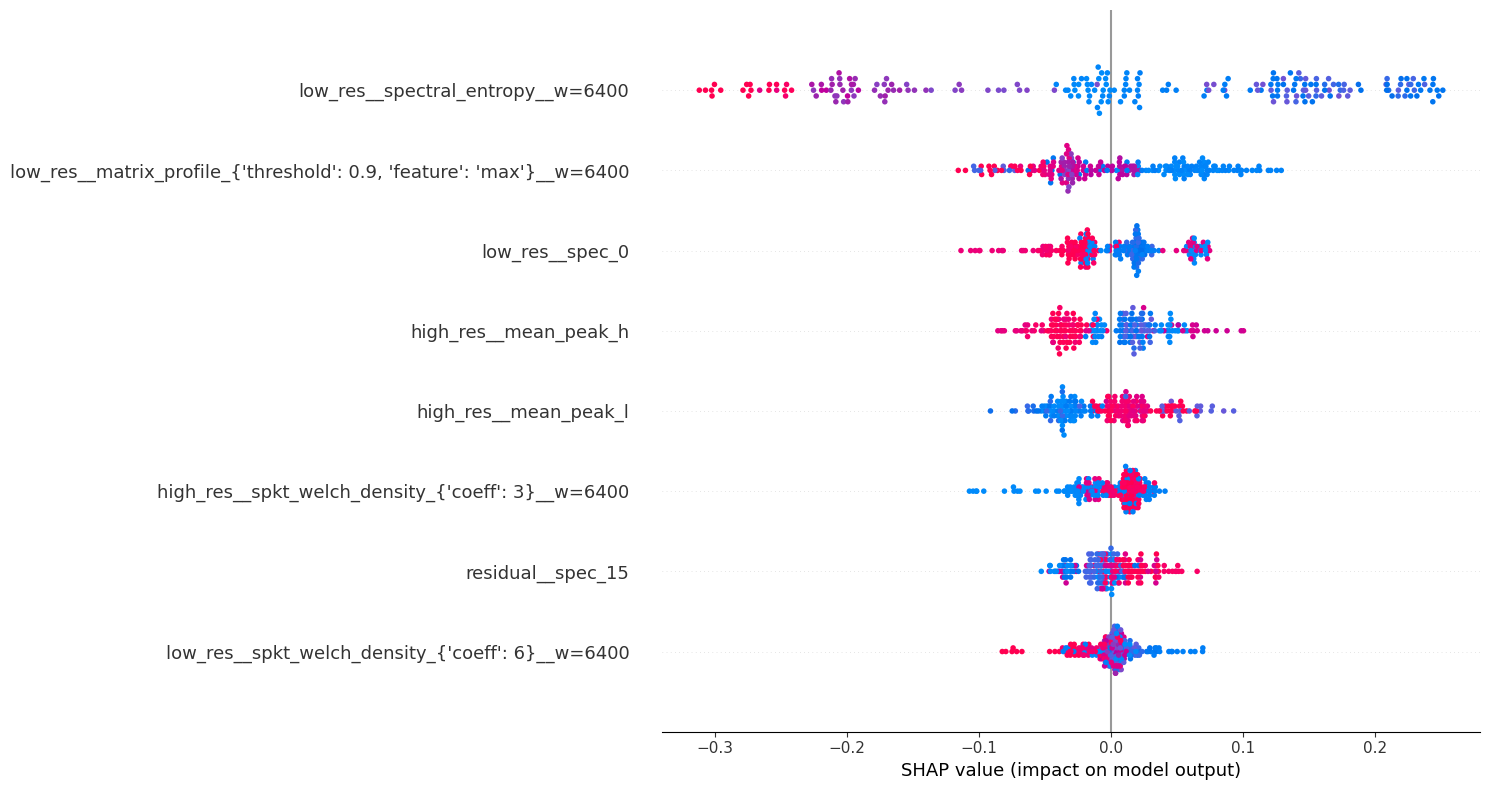

Config:  ('V', 750)


100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


MAE over train folds: 0.005581819512533989 +/- 0.0027101026471575388
MAE over test folds: 0.03116126612202188 +/- 0.00788109681609183


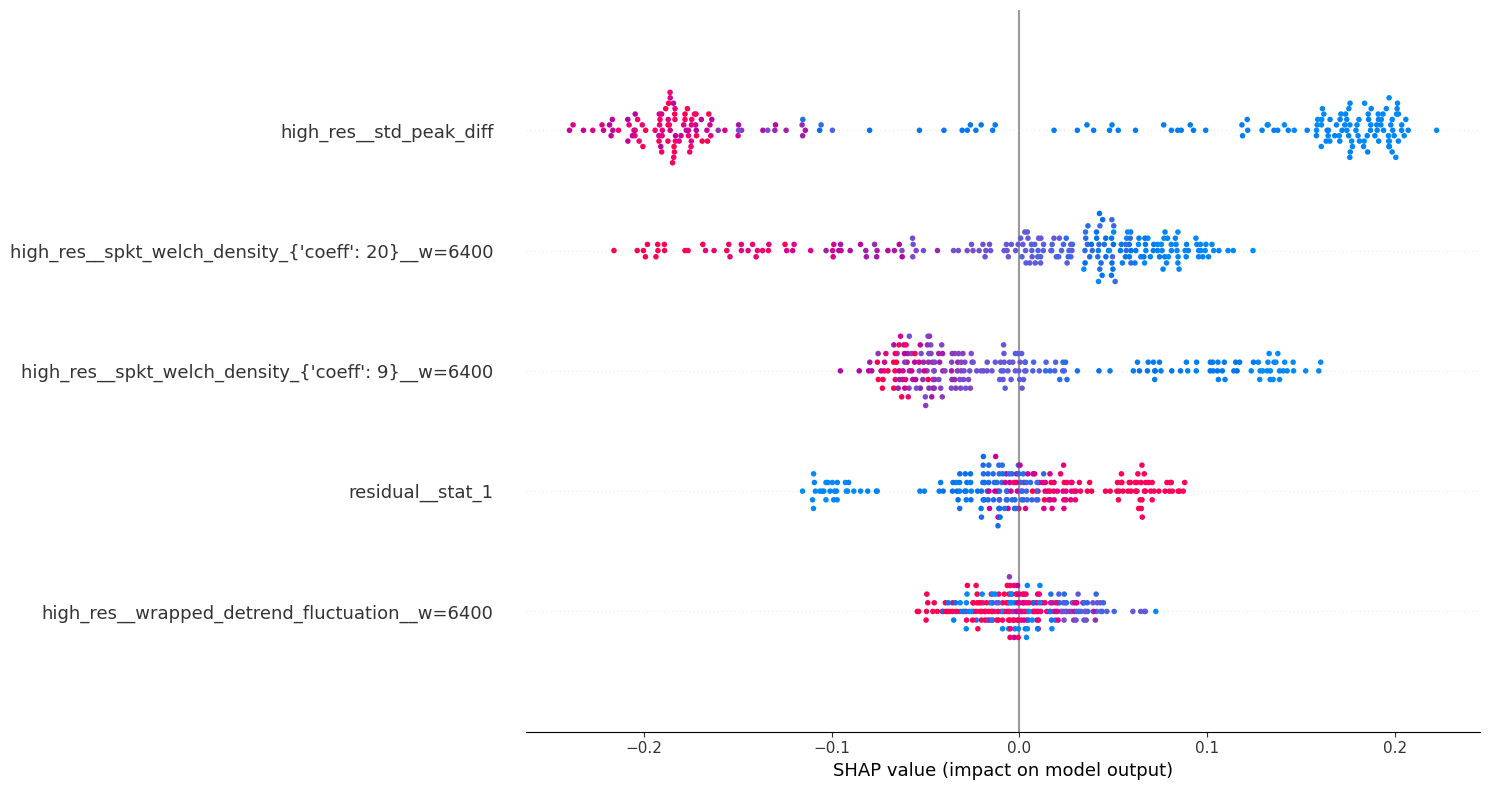

Config:  ('V', 425)


100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


MAE over train folds: 0.0058433953757827 +/- 0.0041179206184595845
MAE over test folds: 0.026404092848801013 +/- 0.0053893098951698915


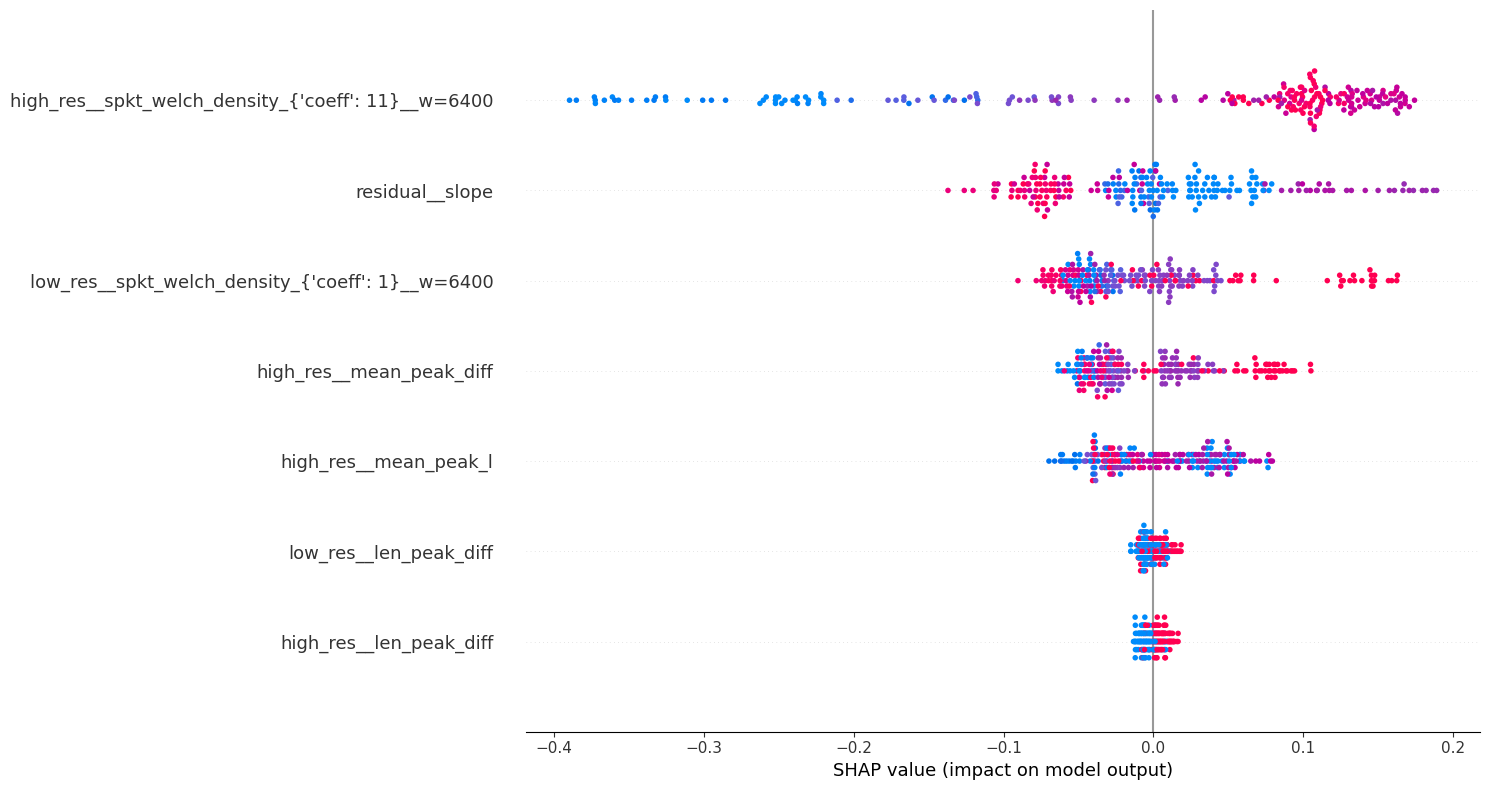

Config:  ('H', 750)


100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


MAE over train folds: 0.0014440685500714495 +/- 8.41694562732889e-05
MAE over test folds: 0.02709944163488735 +/- 0.005364309794472358


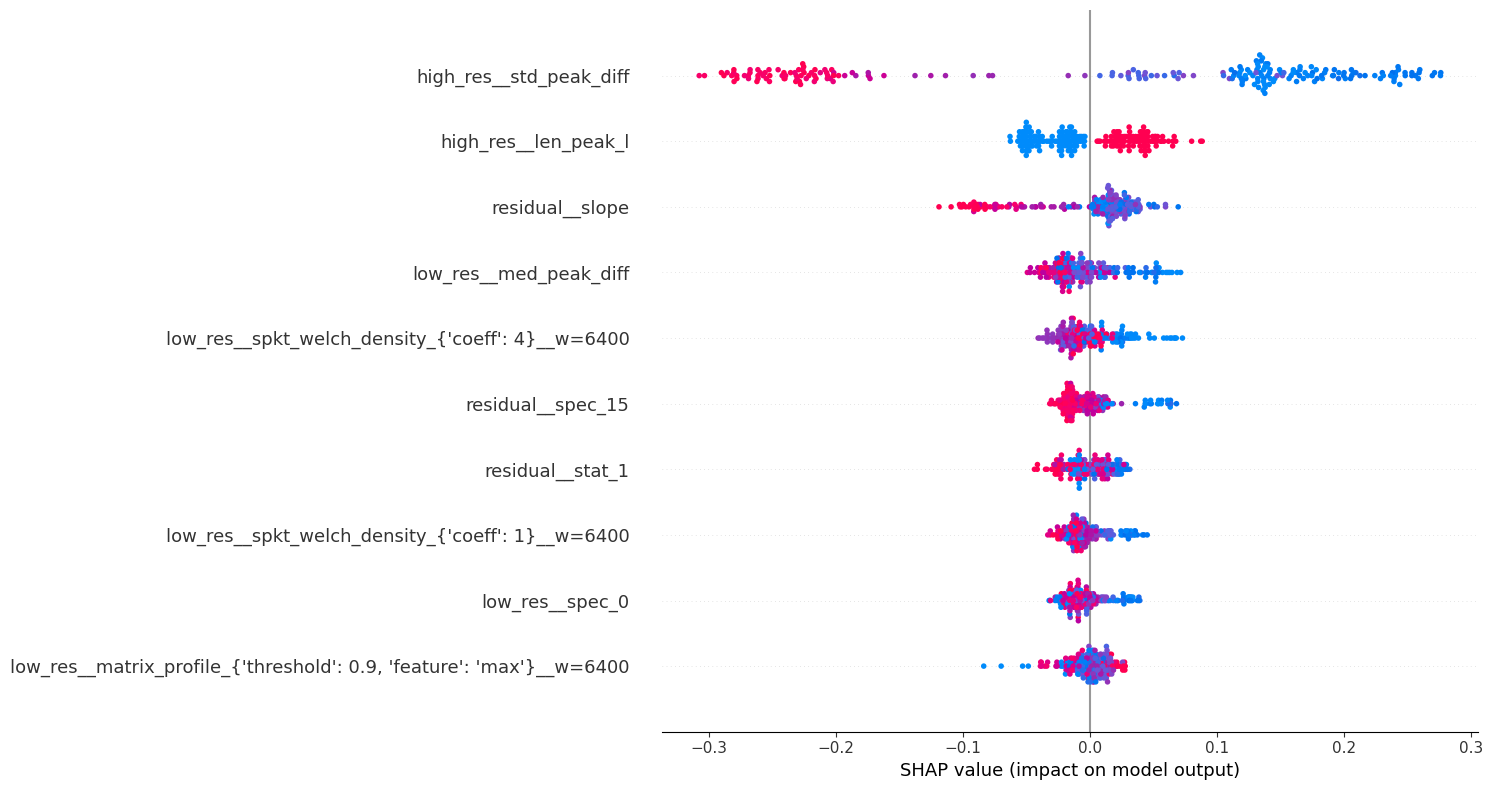

Window size:  12800
Config:  ('H', 425)


100%|██████████| 5/5 [00:01<00:00,  2.75it/s]


MAE over train folds: 0.006088586710428572 +/- 0.004400468156358595
MAE over test folds: 0.03790290037945111 +/- 0.009500767346952809


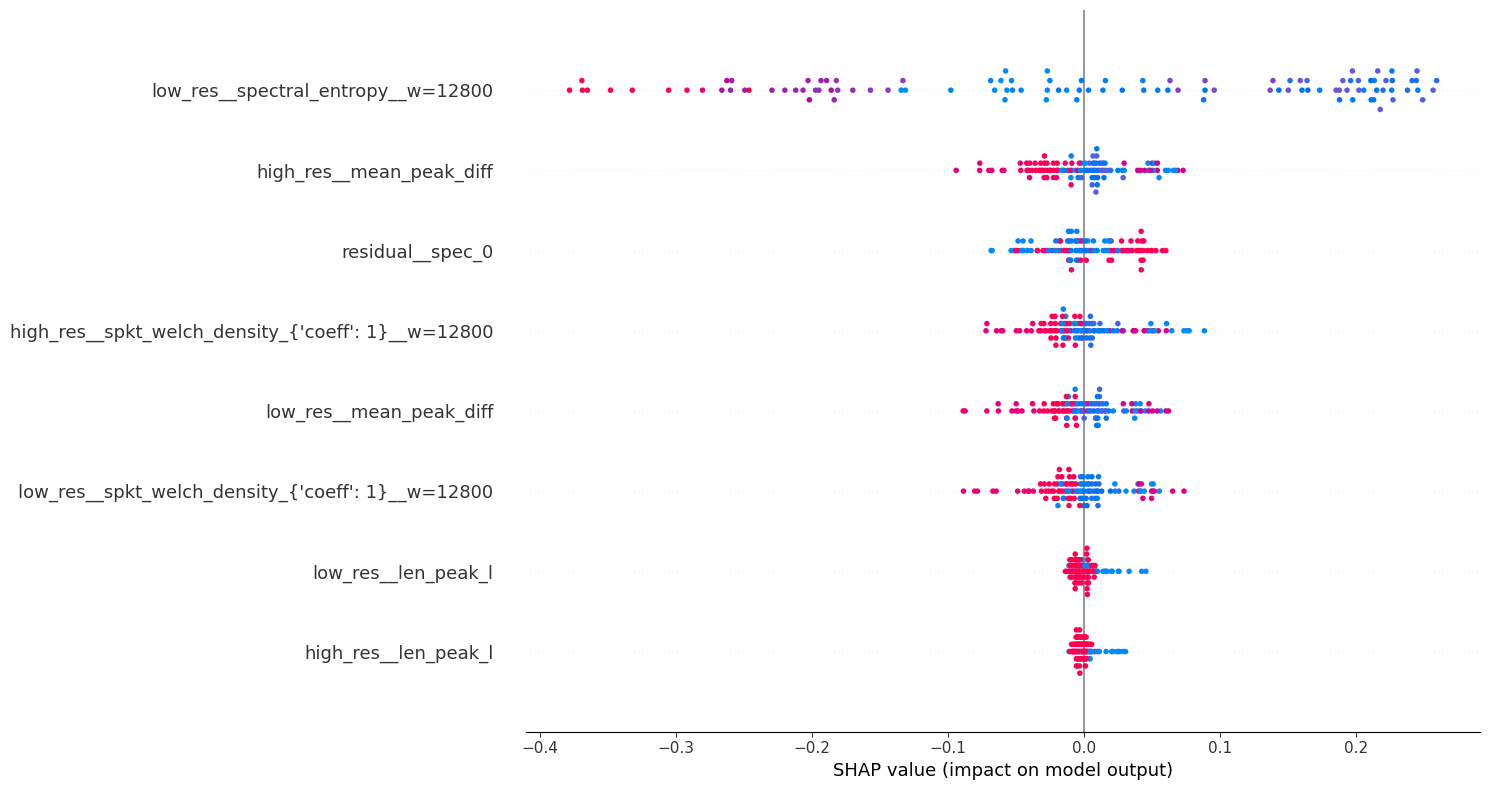

Config:  ('V', 750)


100%|██████████| 5/5 [00:01<00:00,  4.32it/s]


MAE over train folds: 0.005751338100006449 +/- 0.002681247405348845
MAE over test folds: 0.03097579844136831 +/- 0.00483127835203393


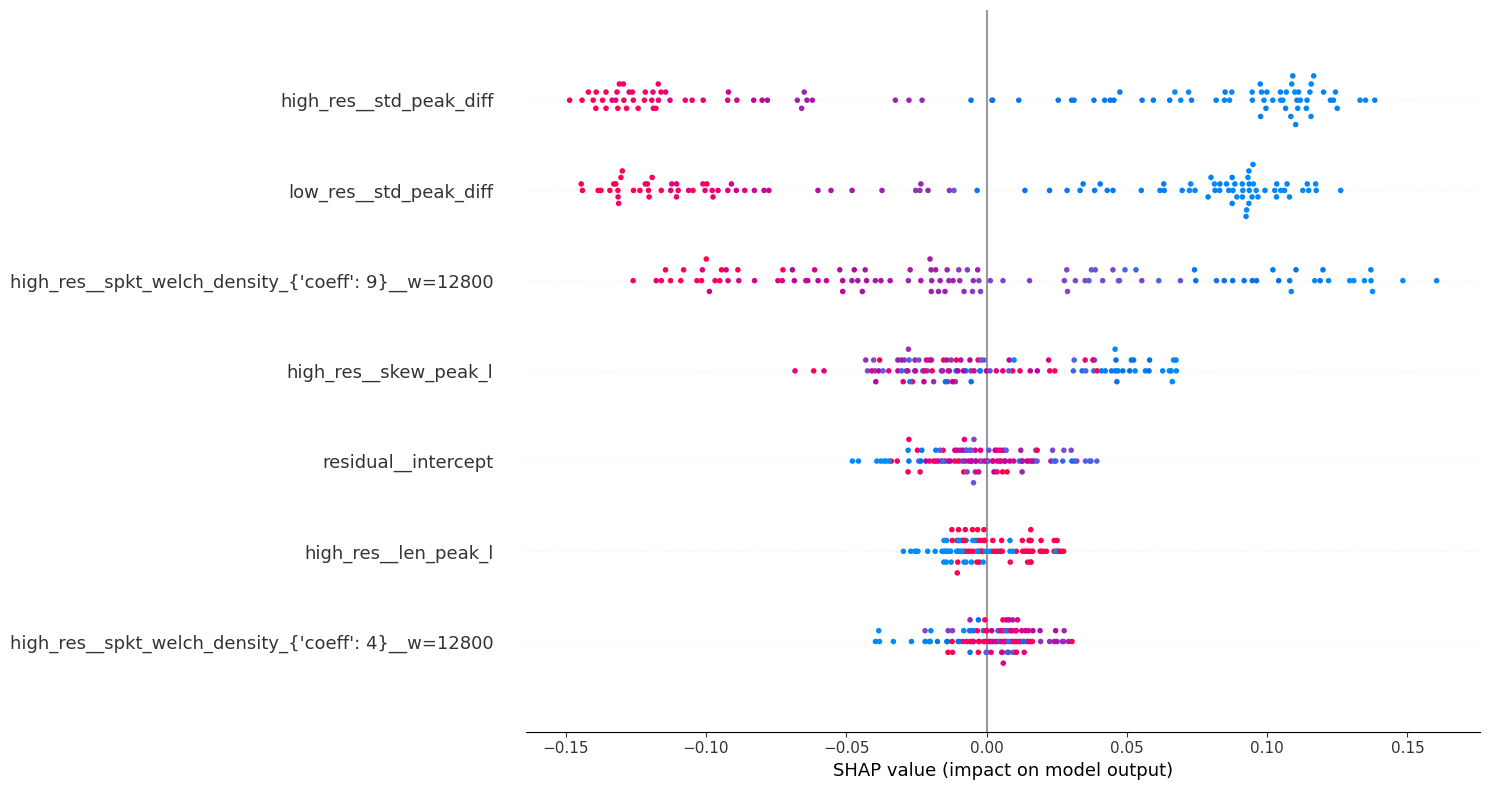

Config:  ('V', 425)


100%|██████████| 5/5 [00:01<00:00,  2.91it/s]


MAE over train folds: 0.007245378496284429 +/- 0.0038569644360593345
MAE over test folds: 0.026845937562825044 +/- 0.006416826050044411


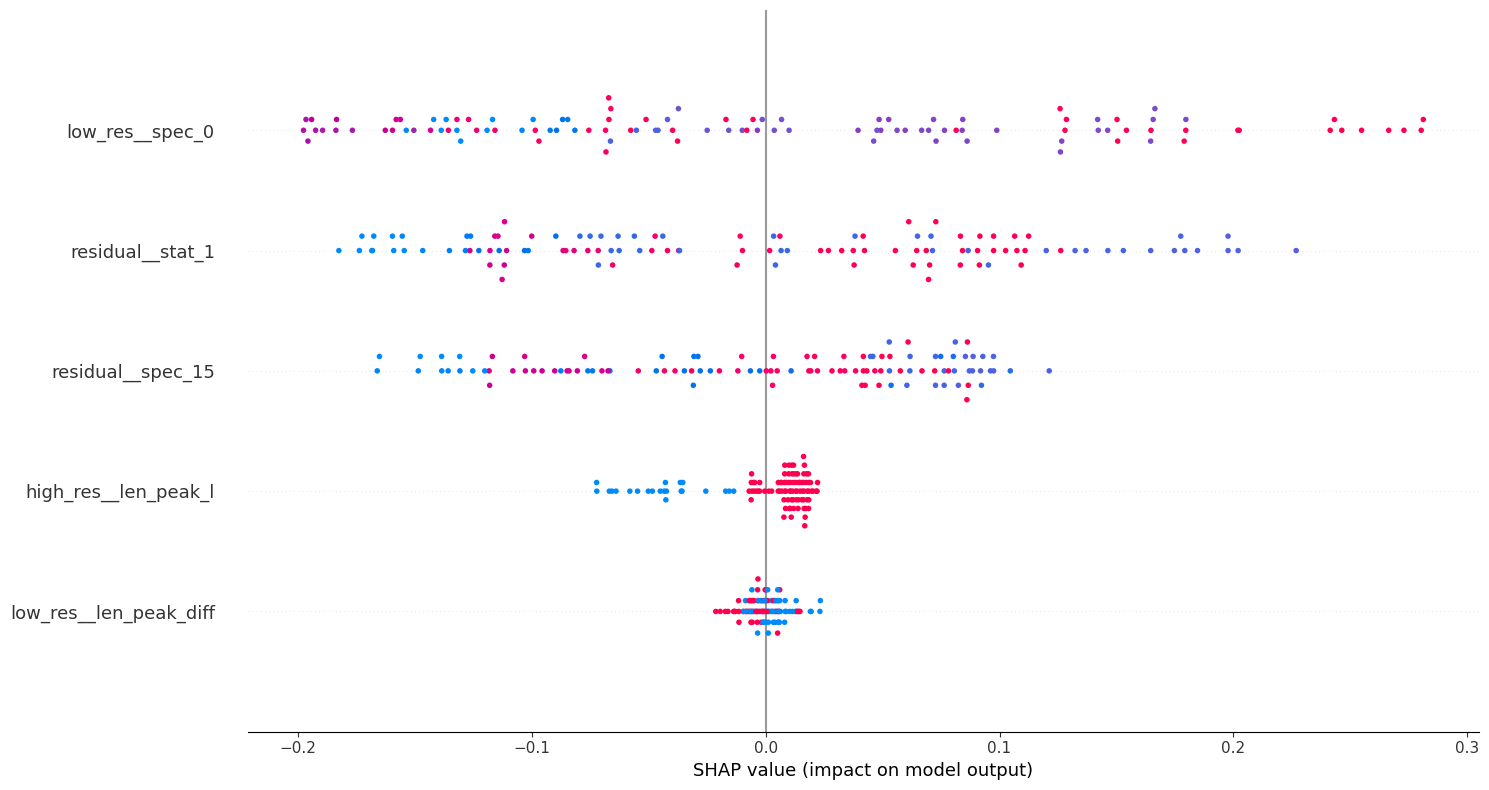

Config:  ('H', 750)


100%|██████████| 5/5 [00:01<00:00,  2.52it/s]


MAE over train folds: 0.002034550570267083 +/- 0.0010562901652622731
MAE over test folds: 0.03288881481698961 +/- 0.0062270451535710175


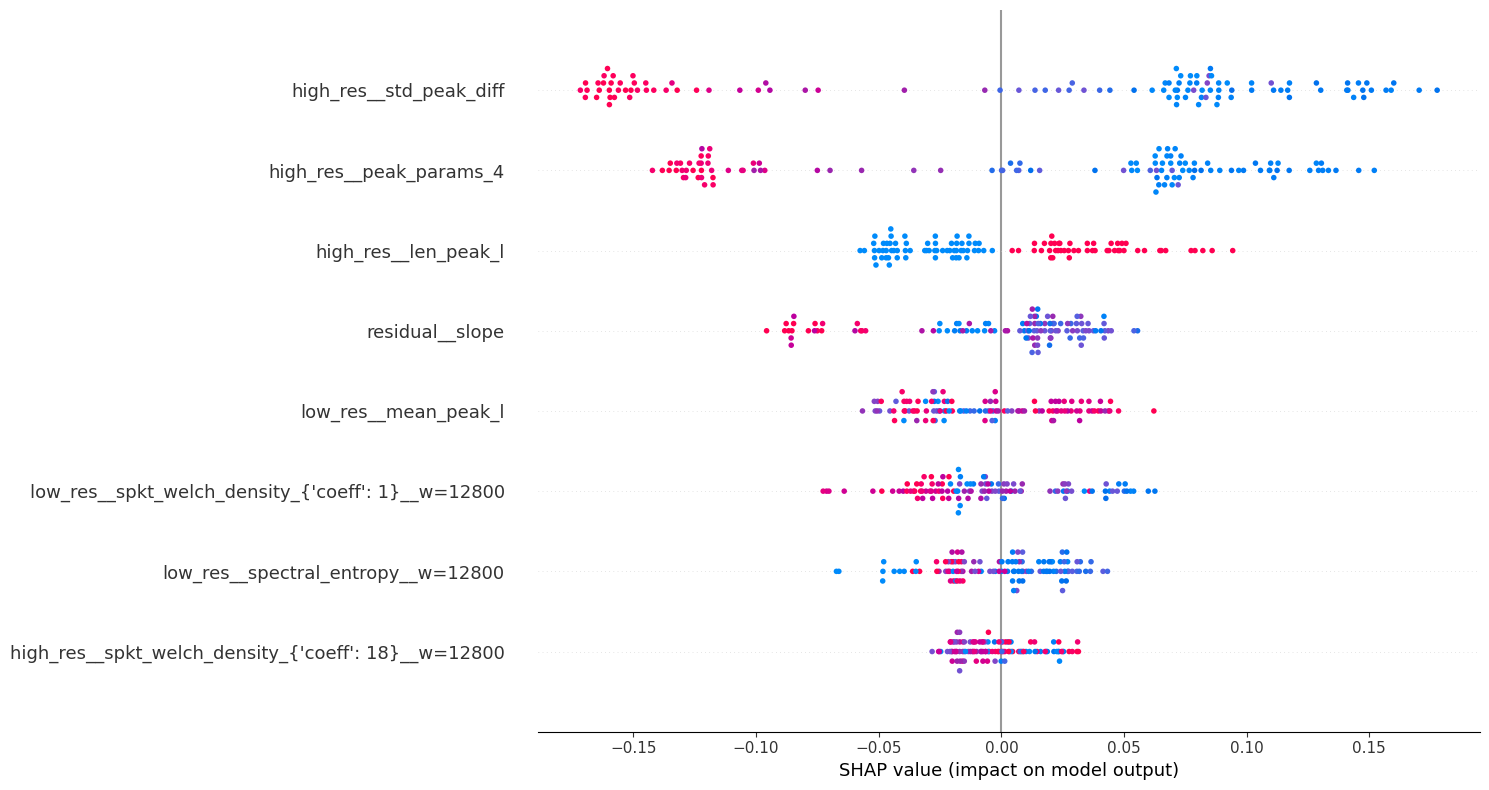

Window size:  1600
Config:  ('H', 425)


100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


MAE over train folds: 0.0402056323566163 +/- 0.006185114733583557
MAE over test folds: 0.08798373600956201 +/- 0.006241716816783997


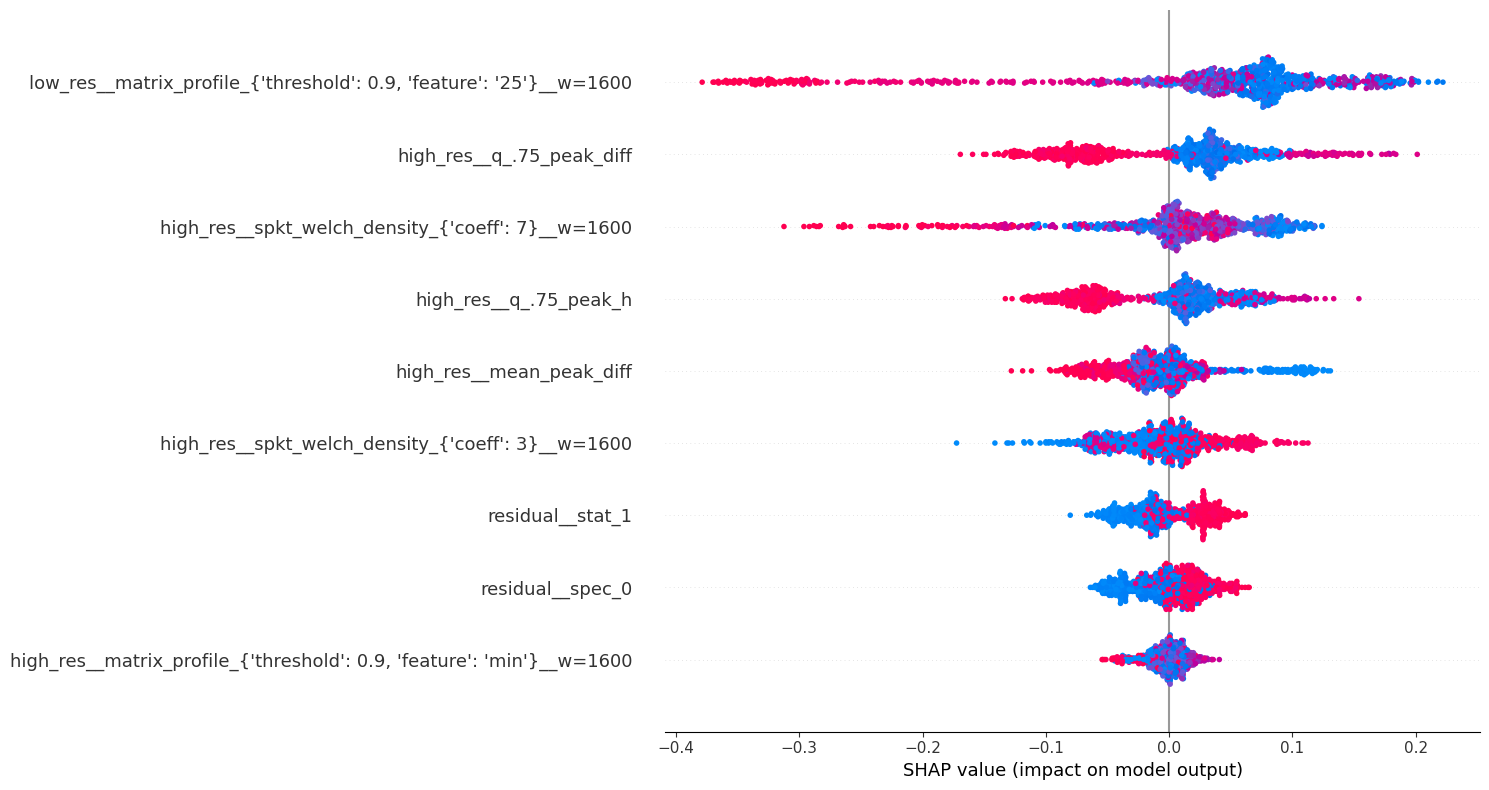

Config:  ('V', 750)


100%|██████████| 5/5 [00:04<00:00,  1.18it/s]


MAE over train folds: 0.021620027817563465 +/- 0.006724173892790346
MAE over test folds: 0.050999676665116754 +/- 0.007941492566415558


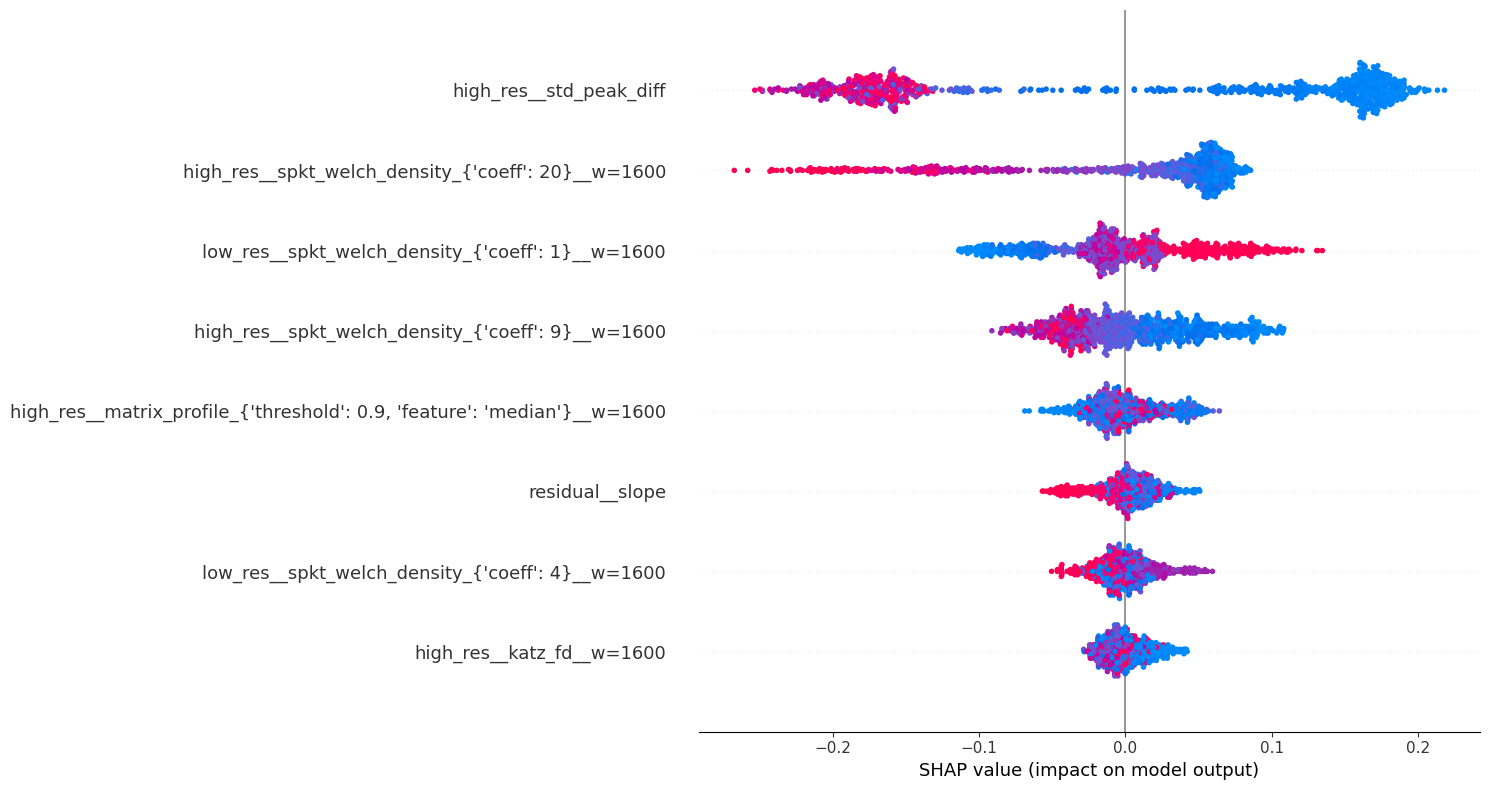

Config:  ('V', 425)


100%|██████████| 5/5 [00:04<00:00,  1.12it/s]


MAE over train folds: 0.018263572652916206 +/- 0.008857185224633373
MAE over test folds: 0.0484672092340385 +/- 0.005383841019745479


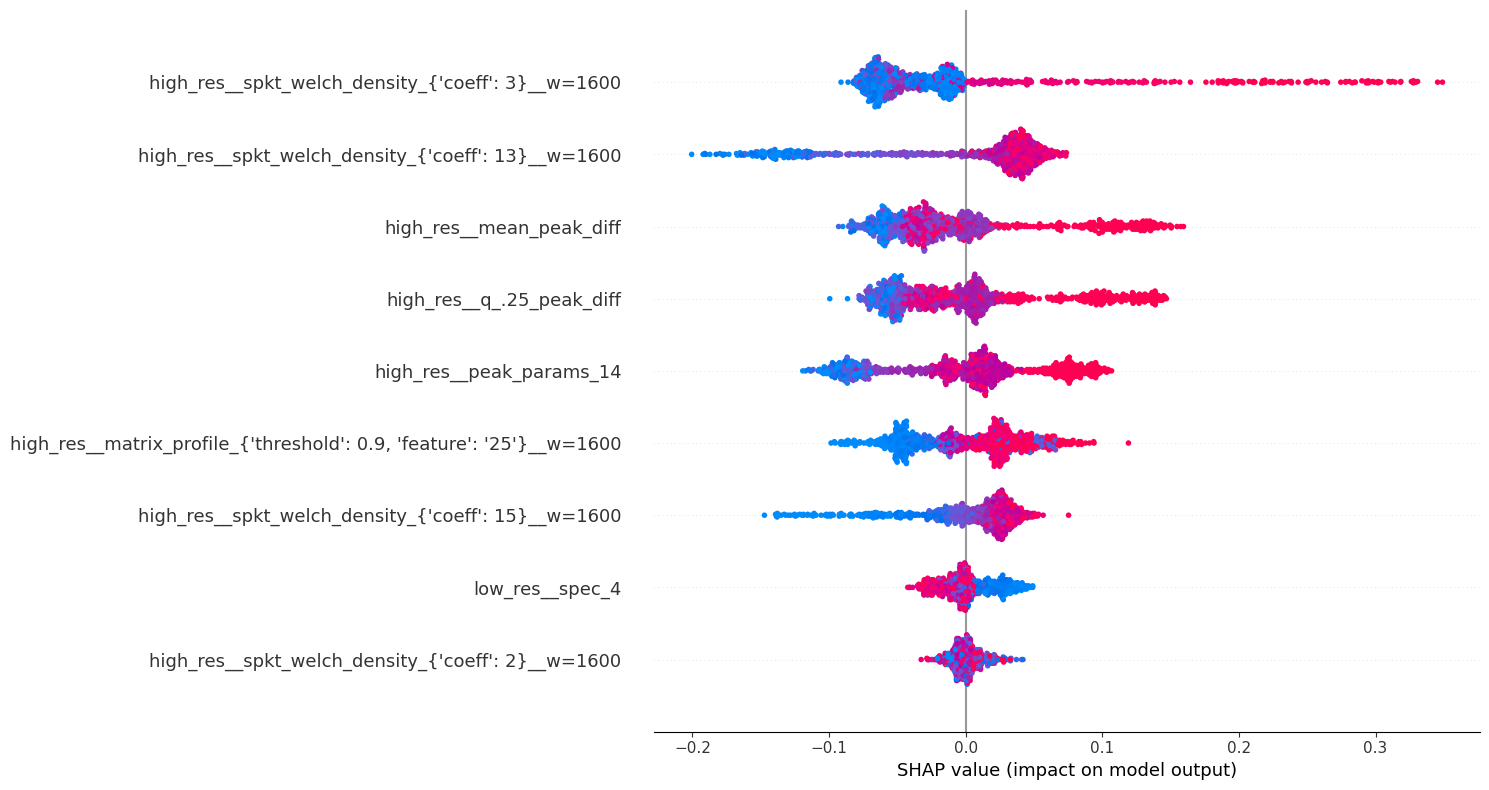

Config:  ('H', 750)


100%|██████████| 5/5 [00:06<00:00,  1.28s/it]


MAE over train folds: 0.009564273742194342 +/- 0.0027337025382936607
MAE over test folds: 0.04980344704529776 +/- 0.007052906466834755


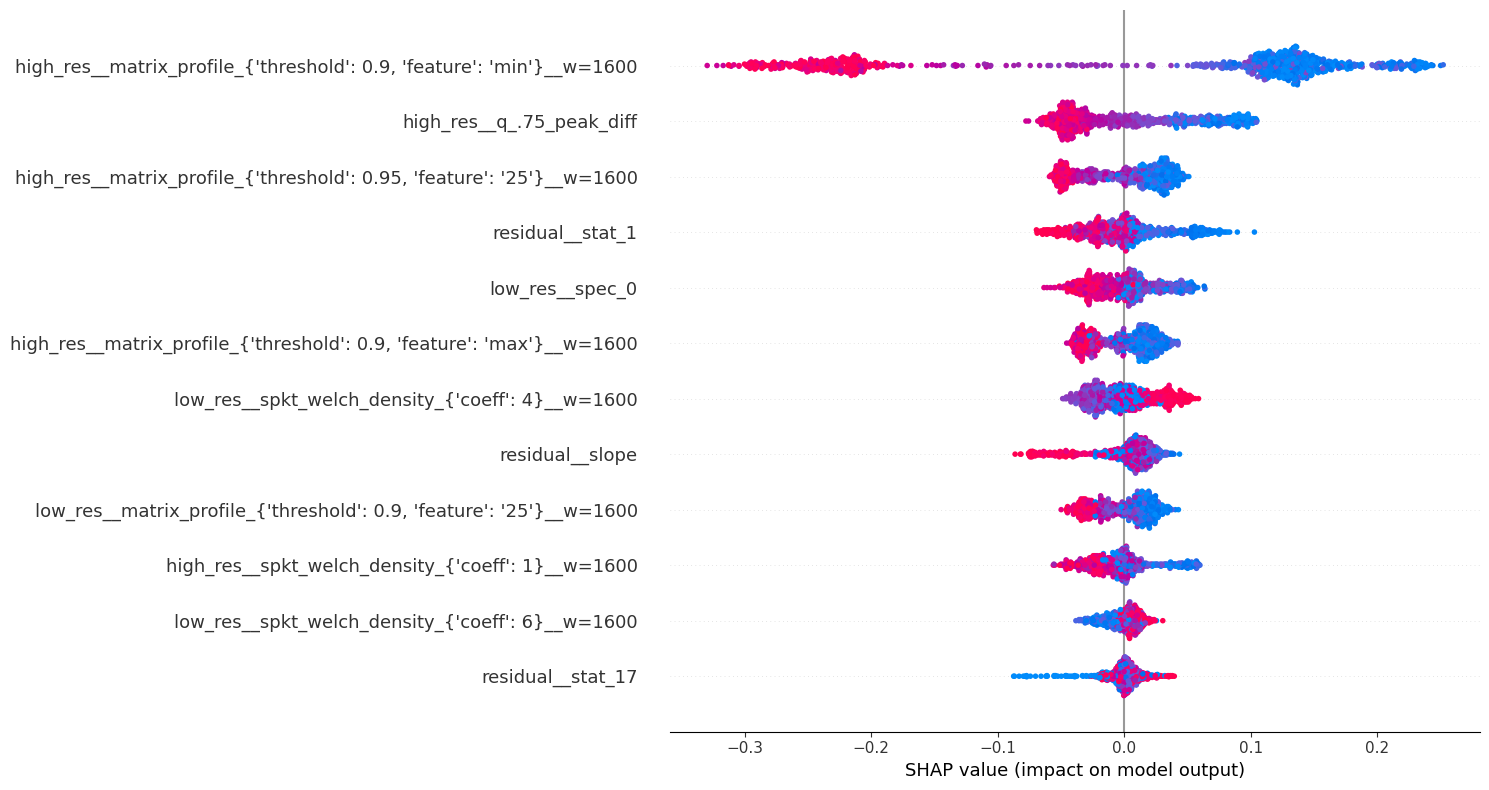

Window size:  3200
Config:  ('H', 425)


100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


MAE over train folds: 0.007845811271226733 +/- 0.0010721113031146316
MAE over test folds: 0.04437679808039309 +/- 0.005823038440640941


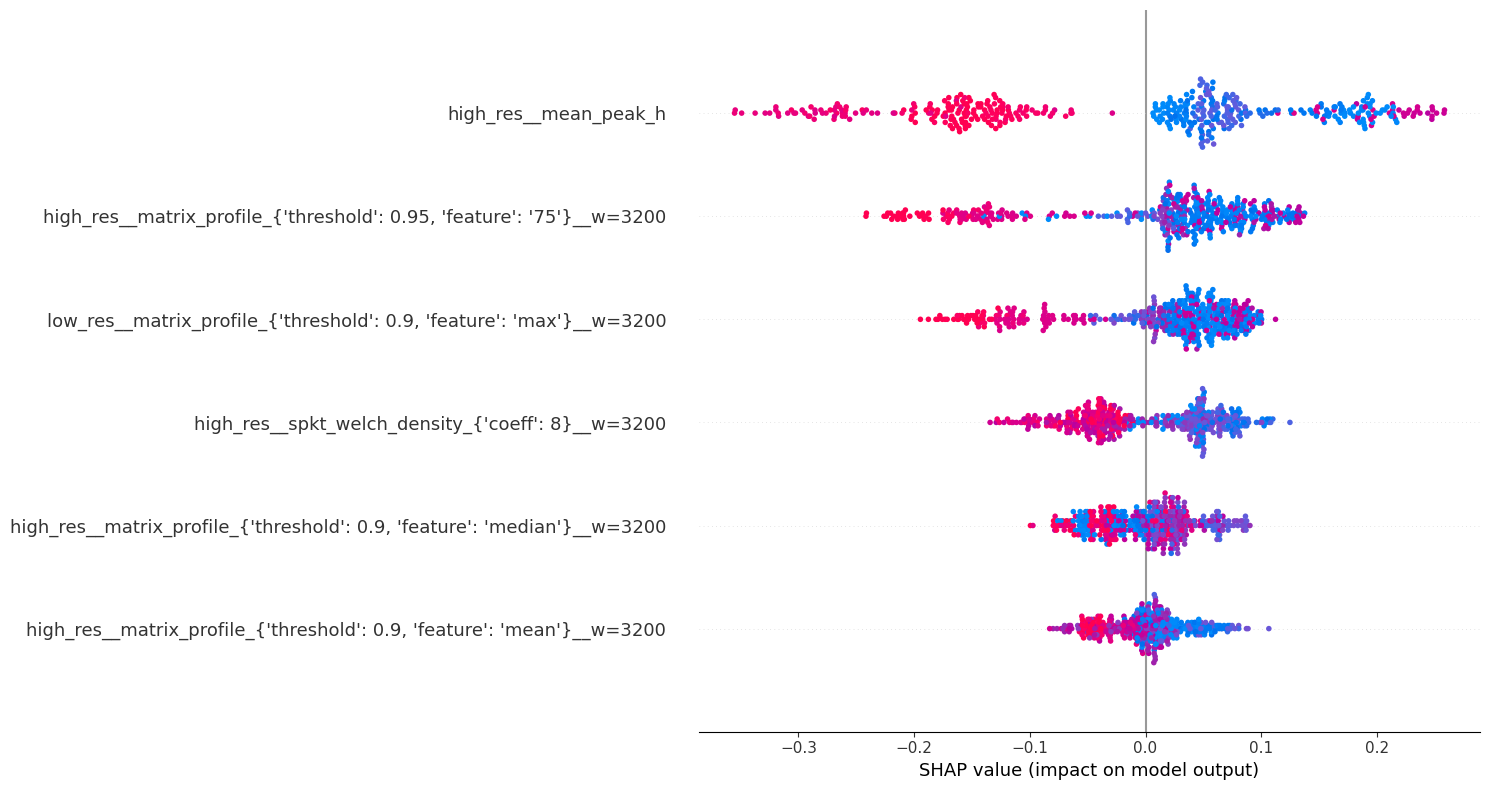

Config:  ('V', 750)


100%|██████████| 5/5 [00:04<00:00,  1.07it/s]


MAE over train folds: 0.005354880236261586 +/- 0.001337232506758661
MAE over test folds: 0.03304540650367791 +/- 0.004339418848257108


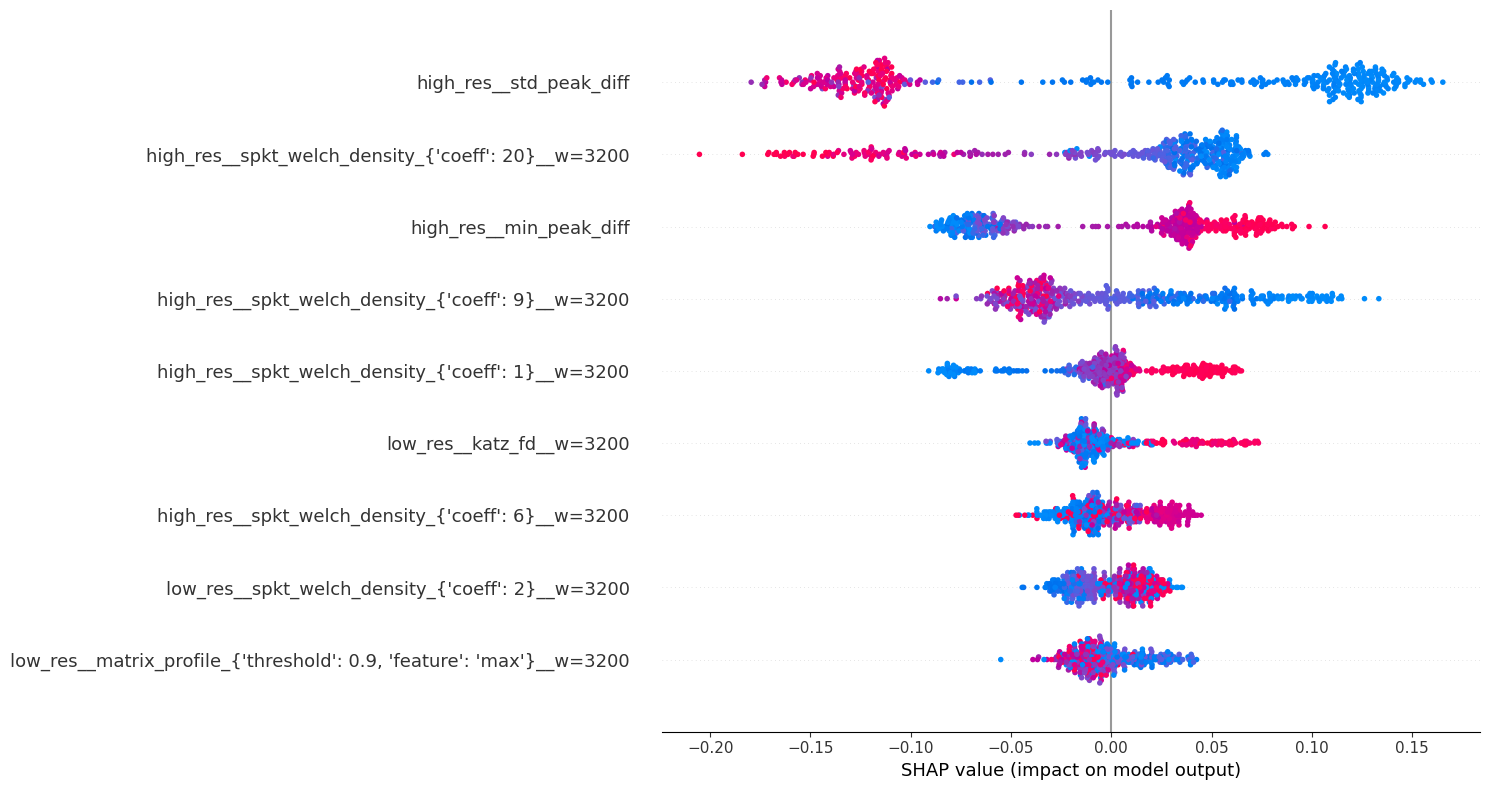

Config:  ('V', 425)


100%|██████████| 5/5 [00:05<00:00,  1.01s/it]


MAE over train folds: 0.005092586537054286 +/- 0.0016638855495255676
MAE over test folds: 0.02891749290096233 +/- 0.004233309107141939


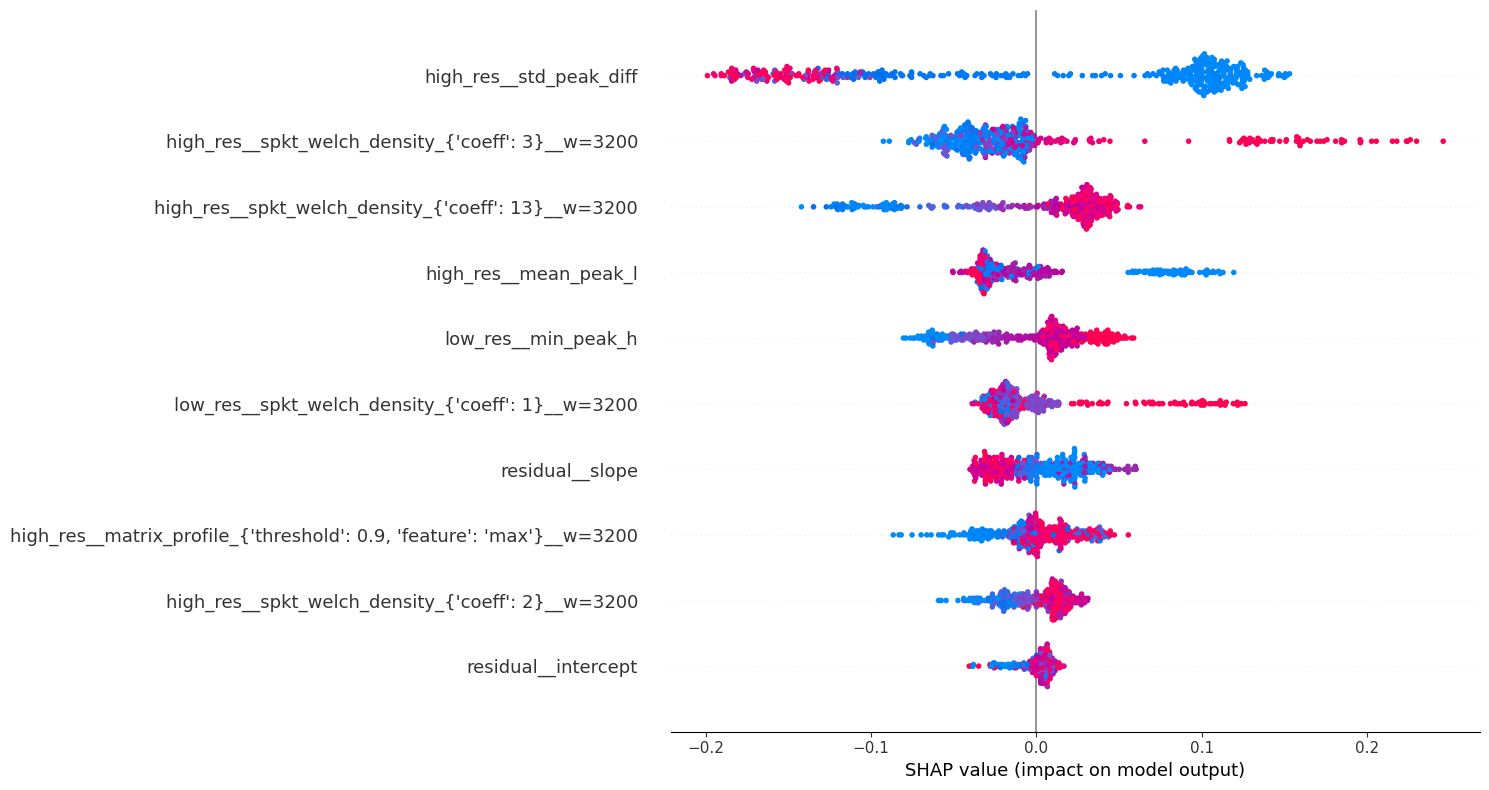

Config:  ('H', 750)


100%|██████████| 5/5 [00:03<00:00,  1.25it/s]


MAE over train folds: 0.005202888122654662 +/- 0.002073183778138096
MAE over test folds: 0.029436916294922205 +/- 0.008275069339828977


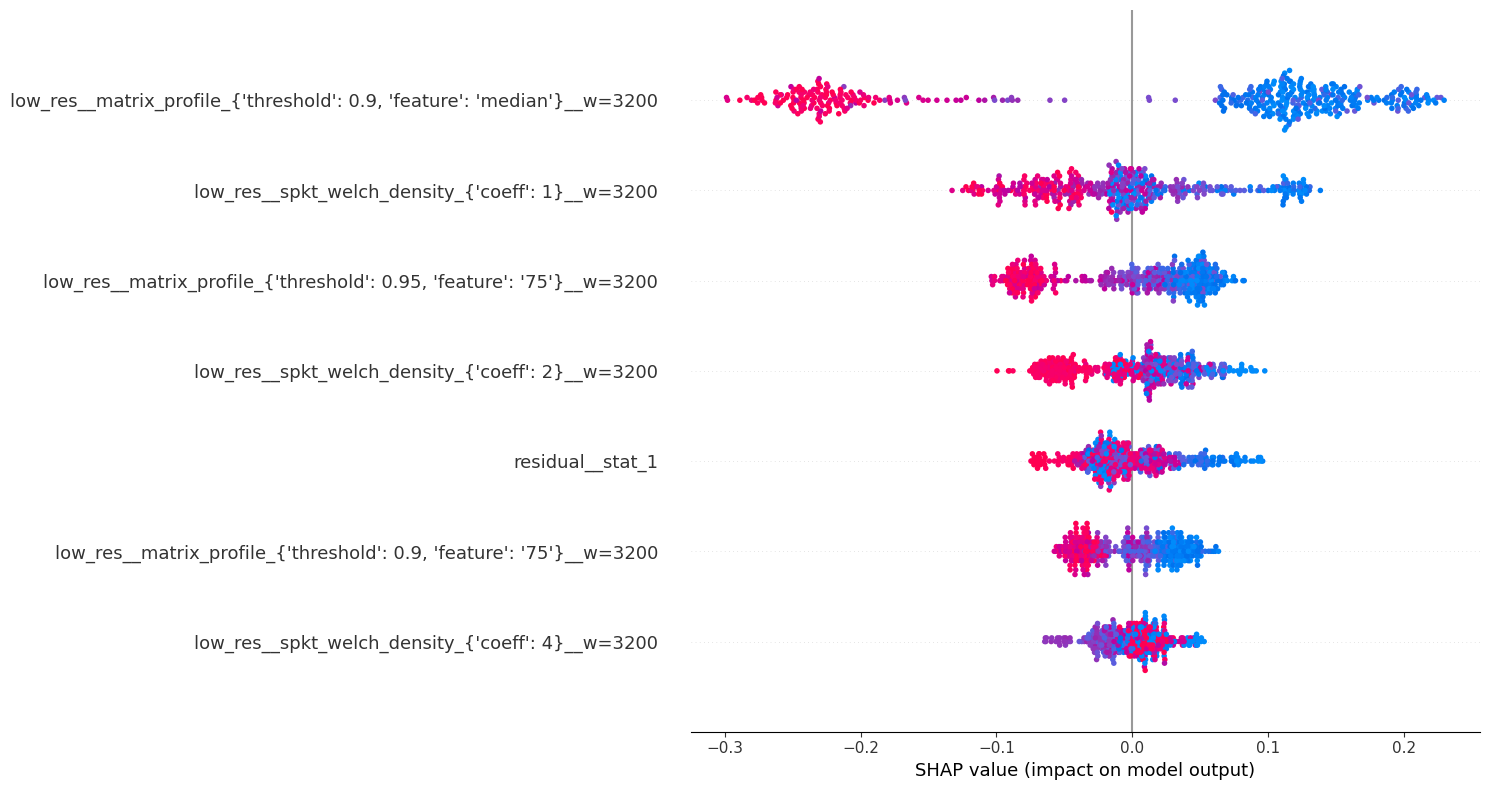

Window size:  400
Config:  ('H', 425)


100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


MAE over train folds: 0.16131069105822637 +/- 0.014750028146851299
MAE over test folds: 0.23186235040967224 +/- 0.0039509891239676975


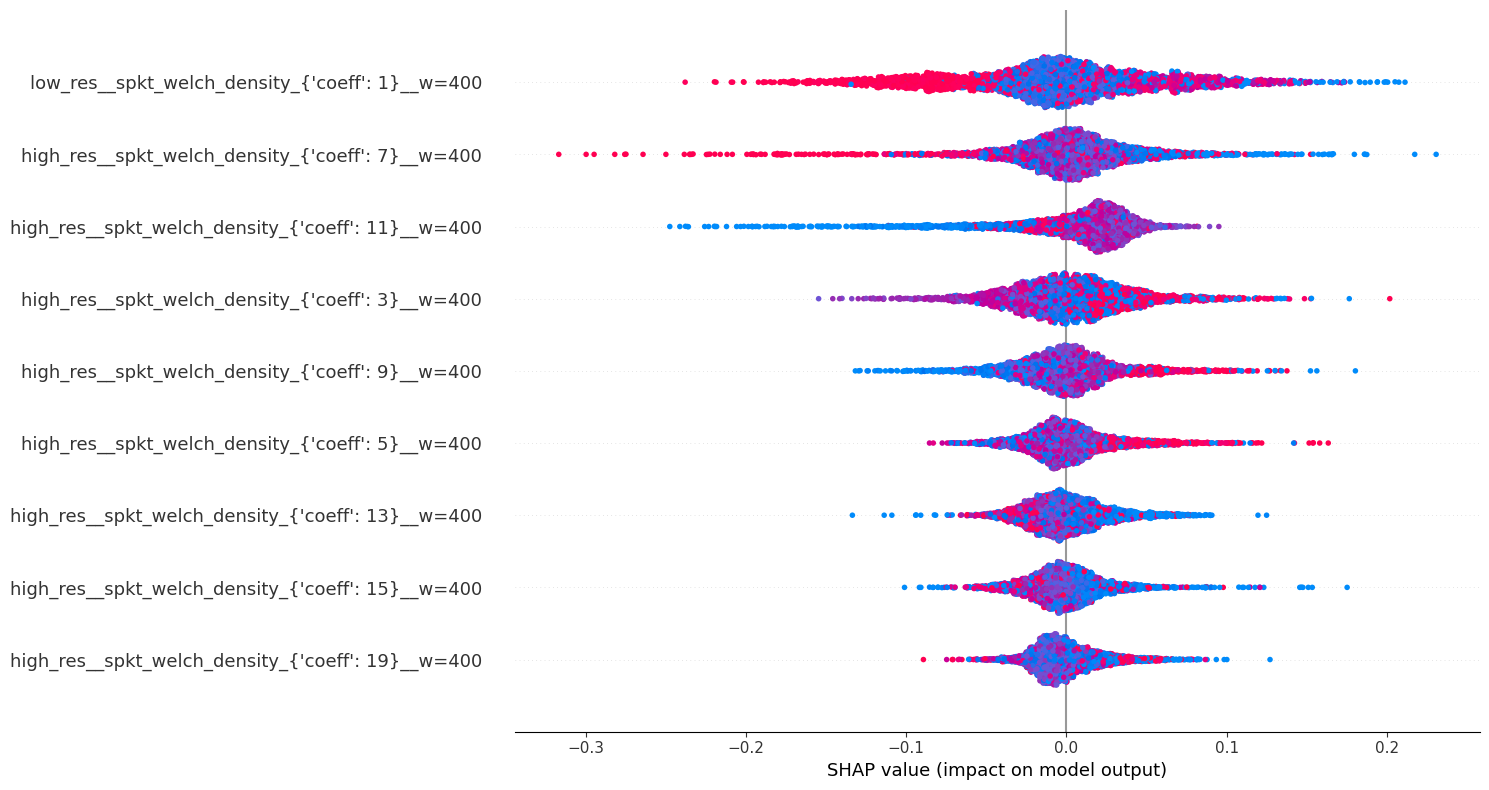

Config:  ('V', 750)


100%|██████████| 5/5 [00:09<00:00,  1.99s/it]


MAE over train folds: 0.04981184205557119 +/- 0.002820375275991085
MAE over test folds: 0.12329688385959867 +/- 0.004359137653071332


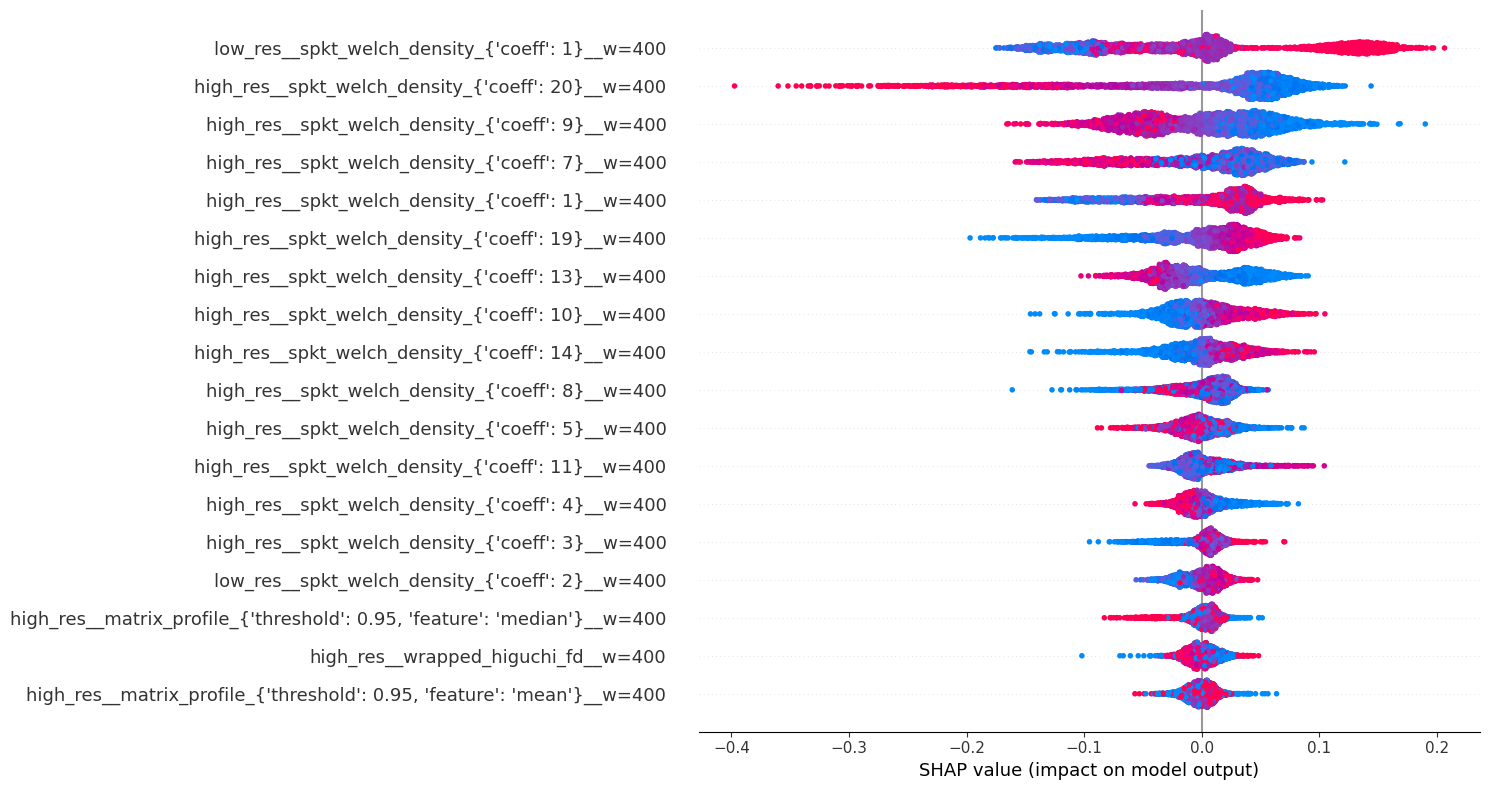

Config:  ('V', 425)


100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


MAE over train folds: 0.07187006139612695 +/- 0.0043606105863122175
MAE over test folds: 0.11398053314361031 +/- 0.0036351570896540216


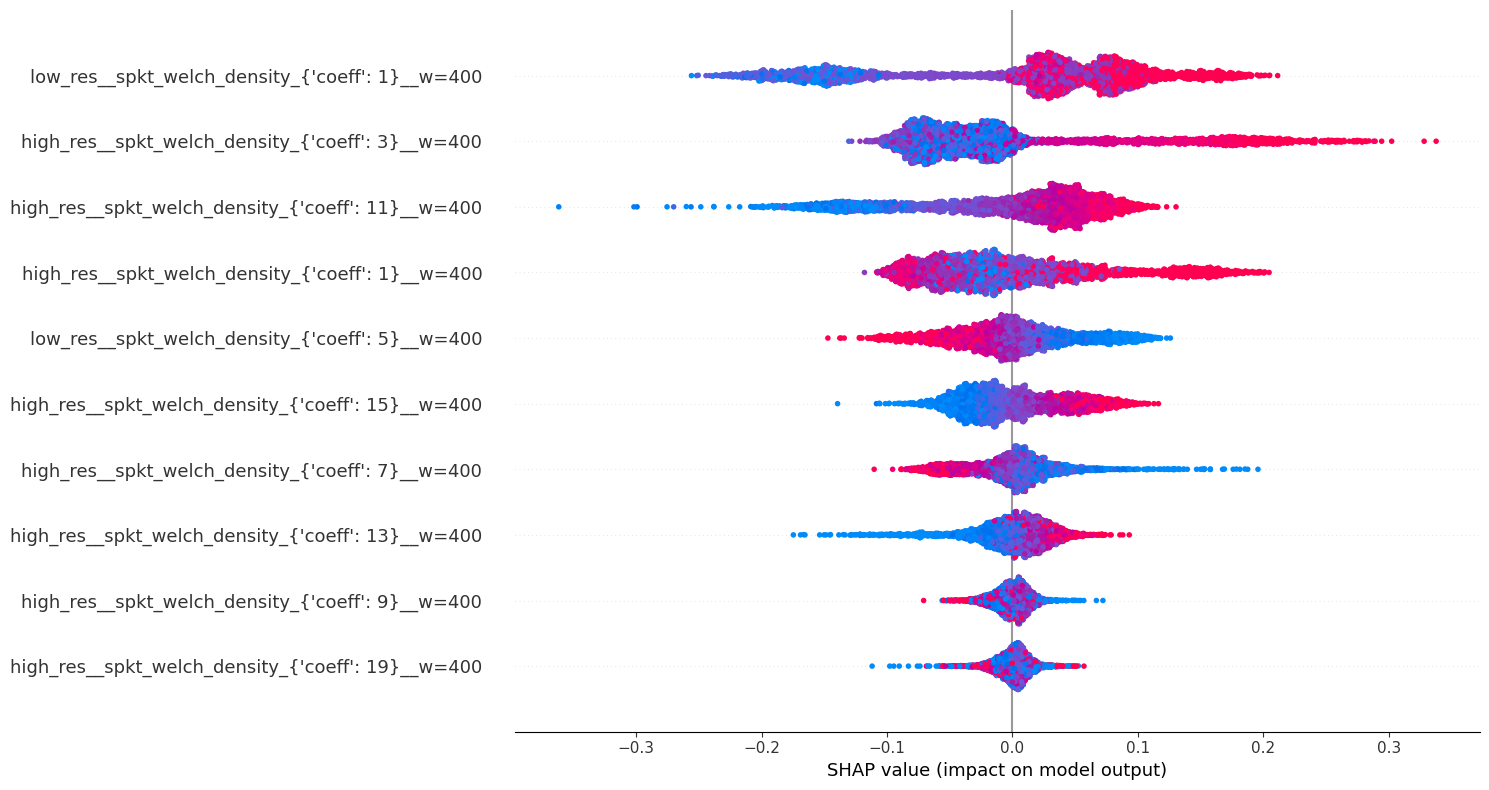

Config:  ('H', 750)


100%|██████████| 5/5 [00:08<00:00,  1.65s/it]


MAE over train folds: 0.07492997852722871 +/- 0.018668918455279557
MAE over test folds: 0.1576090656374029 +/- 0.004135848137424122


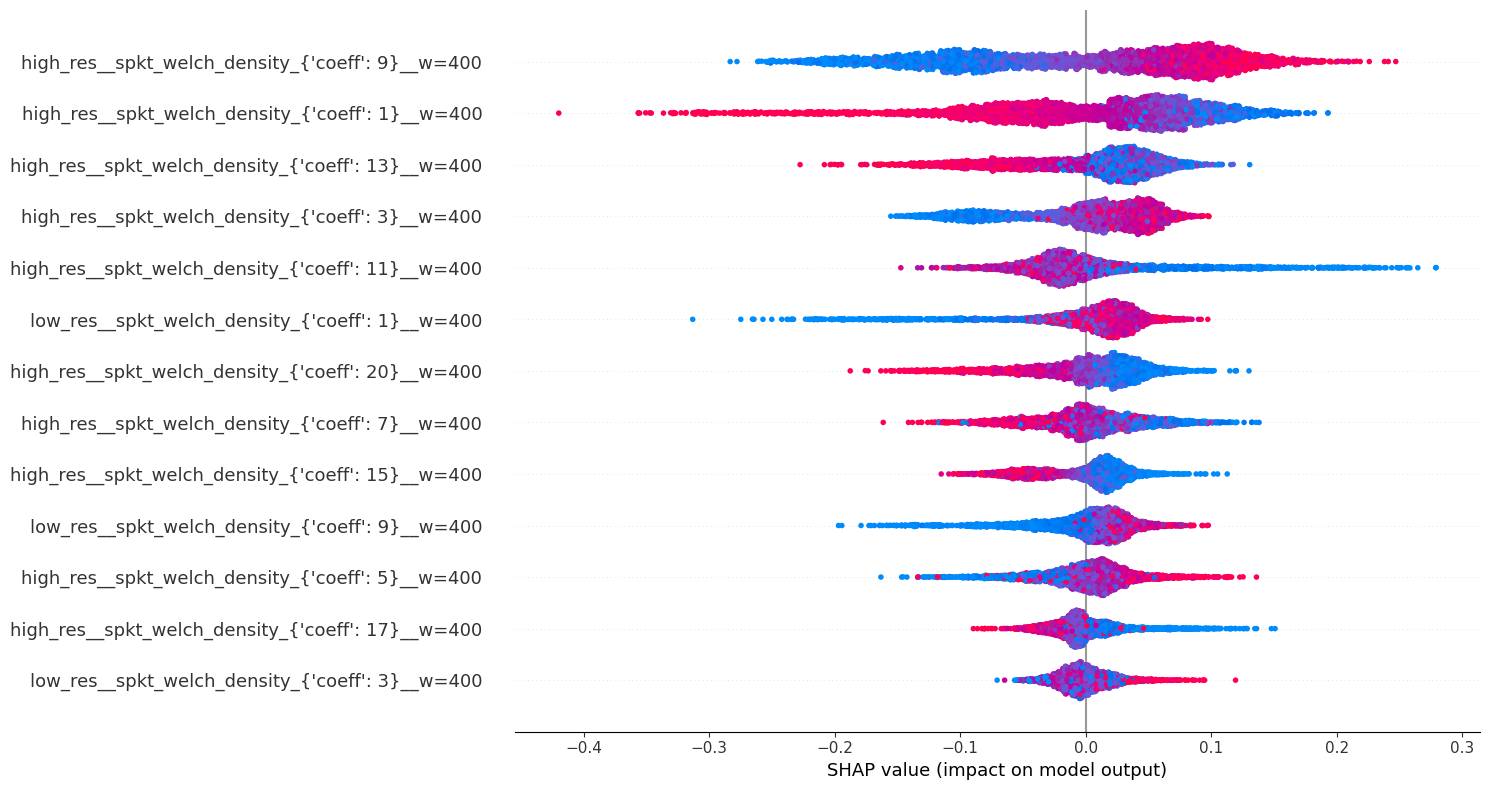

In [8]:
for window_size, split_dict, sel_feat_names, pipe_config_dict in zip_dicts(stratify_perm_dict, sel_feat_dict, pipe_dict):
    print("Window size: ", window_size)
    for config, fold_dict, pipe_list in zip_dicts(split_dict, pipe_config_dict):
        print("Config: ", config)
        shap_list = []
        test_list = []
        train_mae_list = []
        test_mae_list = []
        for fold_nr, set_dict in tqdm(fold_dict.items()):
            x_train = set_dict['train'].drop(['misalignment', 'recording_nr', 'direction', 'speed', 'window_id'], axis=1)[sel_feat_names[config]['selected_features']]
            x_test = set_dict['test'].drop(['misalignment', 'recording_nr', 'direction', 'speed', 'window_id'], axis=1)[sel_feat_names[config]['selected_features']]
            y_train = set_dict['train']['misalignment']
            y_test = set_dict['test']['misalignment']

            train_preds = pipe_list[fold_nr-1].predict(x_train)
            train_mae = mean_absolute_error(y_train, train_preds)
            train_mae_list.append(train_mae)

            test_preds = pipe_list[fold_nr-1].predict(x_test)
            test_mae = mean_absolute_error(y_test, test_preds)
            test_mae_list.append(test_mae)

            explainer = shap.TreeExplainer(pipe_list[fold_nr-1])
            shap_list.append(explainer.shap_values(x_test))
            test_list.append(x_test)

        print("MAE over train folds:", np.mean(train_mae_list), "+/-", np.std(train_mae_list))
        print("MAE over test folds:", np.mean(test_mae_list), "+/-", np.std(test_mae_list))
    
        shap_values = np.concatenate(shap_list)
        test_values = np.concatenate(test_list)
        plt.figure()
        shap.summary_plot(shap_values, test_values, feature_names=sel_feat_names[config]['selected_features'], max_display=20, plot_size=(15, 8), plot_type='dot', show=False, color_bar=False)
        plt.show() 
